In [1]:
import pandas as pd
from sklearn.metrics import classification_report
import shap
from aux_functions import load_and_preprocess_data_1
from aux_voting import voting_classification
import pickle

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = load_and_preprocess_data_1().drop('id_discente',axis=1)
labels = {0: '1. Evasão',
          1: '2. Formação'
          }

0    9075
1    9075
Name: situacao_final_discente, dtype: int64


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


In [4]:
voting_classifier, X_train, X_test, y_test, y_pred, y_prob = voting_classification(data, labels, '1')

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.


<Figure size 640x480 with 0 Axes>

<Figure size 700x400 with 0 Axes>

In [5]:
with open('1/voting/voting_classifier.pickle', 'wb') as file:
    pickle.dump(voting_classifier, file)

In [6]:
print(classification_report(y_test, y_pred, digits=6, target_names=['1. Evasão', '2. Formação']))

              precision    recall  f1-score   support

   1. Evasão   0.903955  0.877193  0.890373      2736
 2. Formação   0.879570  0.905869  0.892526      2709

    accuracy                       0.891460      5445
   macro avg   0.891762  0.891531  0.891449      5445
weighted avg   0.891823  0.891460  0.891444      5445



X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names


  0%|          | 0/5 [00:00<?, ?it/s]

X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not have valid feature names, but SVC was fitted with feature names
X does not have valid feature names, but LogisticRegression was fitted with feature names
X does not

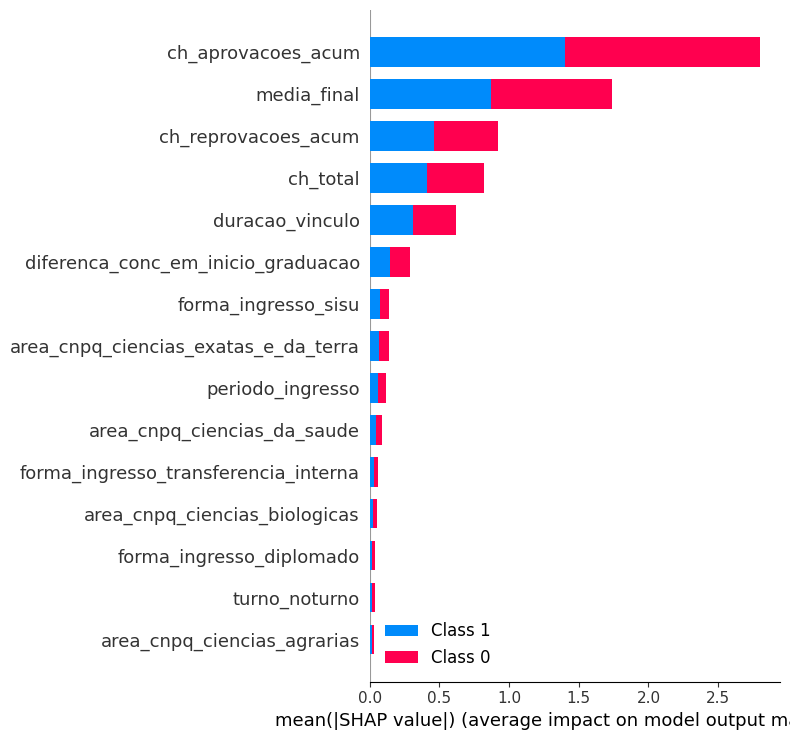

In [7]:
background_summary = shap.sample(X_train, 100)
explainer = shap.KernelExplainer(voting_classifier.predict_proba, background_summary, link="logit")
shap_values = explainer.shap_values(X_test.loc[0:4])
shap.summary_plot(shap_values, X_test.loc[0:4], max_display=15)